<AxesSubplot:>

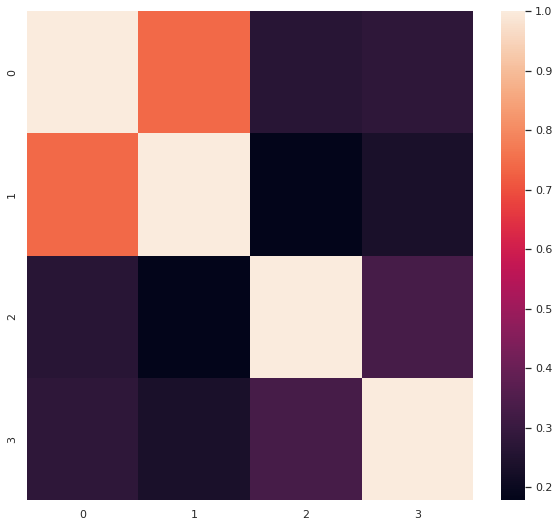

In [70]:
from numpy.core.numeric import full
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler  
from sklearn.datasets import load_iris


iris = load_iris(as_frame=True).frame
iris = iris[iris['target'] == 0].loc[:, iris.columns != 'target']
setosa_matrix = np.array(iris)
setosa_mean = np.mean(setosa_matrix, axis=0)
setosa_std = np.std(setosa_matrix, axis=0)
setosa_norm = (setosa_matrix - setosa_mean) / setosa_std
sns.heatmap(np.corrcoef(setosa_norm, rowvar=False))



Проверил, правильно ли нормализовал матрицу через sklearn:

In [71]:
scaler = StandardScaler()
norm_sklearn = pd.DataFrame(scaler.fit_transform(iris))
norm_sklearn - setosa_norm

,0,1,2,3
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0


In [77]:
U, S, V = np.linalg.svd(setosa_norm, full_matrices=True)
display(S)
def reconstruct_matrix(U, S, V, k) -> np.ndarray:
  """k is the desired amount of feature vectors"""
  U, S, V = U[:,:k], np.diag(S[:k]), V[:k, :]
  # S = np.pad(S, ((0,U.shape[1]-S.shape[1]),(0,0)), mode='constant', constant_values=0)
  display(S)
  A = U @ S @ V
  return A


all_matricies_error = setosa_norm - reconstruct_matrix(U, S, V, 1)
for k in [2, 3, 4]:
  all_matricies_error = np.append(all_matricies_error, setosa_norm - reconstruct_matrix(U, S, V, k), axis=1)


array([10.14529501,  7.14904974,  5.77849567,  3.54585177])

array([[10.14529501]])

array([[10.14529501,  0.        ],
       [ 0.        ,  7.14904974]])

array([[10.14529501,  0.        ,  0.        ],
       [ 0.        ,  7.14904974,  0.        ],
       [ 0.        ,  0.        ,  5.77849567]])

array([[10.14529501,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  7.14904974,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  5.77849567,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  3.54585177]])

График heatmap, показывающий модули отклонений восстановленных матриц по мере увеличения количества сингулярных векторов. Самая левая - 1 вектор, самая правая - все векторы.

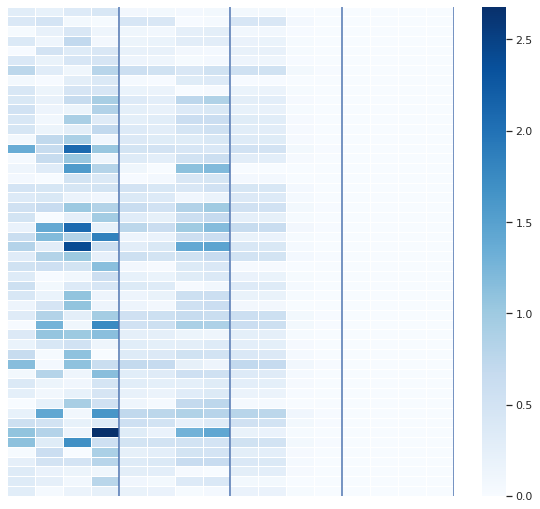

In [76]:
sns.set(rc={"figure.figsize":(10, 9)})
ax = sns.heatmap(abs(all_matricies_error), linewidth=0.5, cmap='Blues')
ax.vlines([4, 8, 12, 16], *ax.get_ylim())
ax.set(xticklabels=[], yticklabels=[]) 
ax.tick_params(bottom=False, left=False)
plt.show()

array([[ 3.98153922e-02,  6.42575632e-01, -9.72340756e-02],
       [ 1.15321026e+00, -1.36821319e-01, -5.76754722e-02],
       [ 1.41122398e+00,  2.70827167e-01,  3.74379147e-01],
       [ 1.30107106e+00, -6.72034620e-01, -3.93782053e-01],
       [ 5.96325529e-02,  6.64054348e-01, -7.81205575e-02],
       [-2.52106935e+00, -7.44195398e-01,  6.75010468e-02],
       [ 6.73000124e-01, -4.80214024e-01,  7.01919855e-01],
       [ 1.48041875e-01,  6.44048991e-02, -4.71567693e-01],
       [ 2.17266224e+00, -7.34302924e-01,  3.90334617e-02],
       [ 1.16770374e+00,  1.41274876e-01, -1.15413828e+00],
       [-1.00498731e+00,  8.00844418e-01, -5.49353333e-01],
       [ 2.76085519e-01, -4.92287118e-01, -8.26787793e-01],
       [ 1.71268903e+00,  2.92486251e-01, -7.40816727e-01],
       [ 3.23388487e+00,  9.06557005e-01,  5.37184733e-01],
       [-1.50287829e+00,  2.63135710e+00,  5.54343778e-01],
       [-3.37091693e+00,  8.60584143e-01,  7.96293868e-01],
       [-1.64755173e+00,  7.14568818e-01

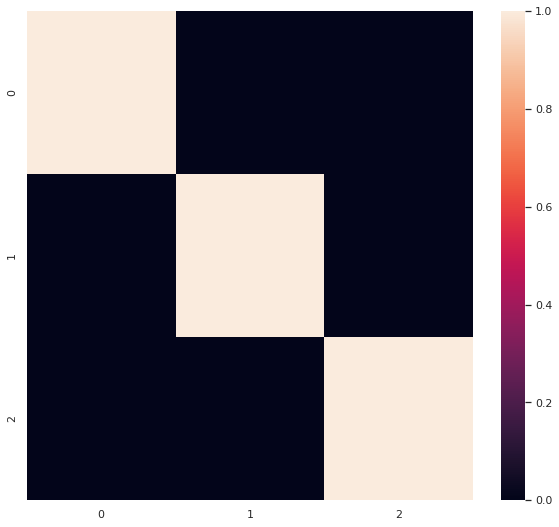

In [74]:

reduced_matrix =  U[:,:3] @ np.diag(S[:3])
sns.heatmap(np.corrcoef(reduced_matrix, rowvar=False))
display(reduced_matrix)